In [1]:
!pip install pandas joblib seaborn matplotlib yfinance

In [2]:
import pandas as pd
import yfinance as yf
import joblib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


In [3]:
backtest = pd.read_csv('./Scrappings/dados/interseccao.csv')

backtest = pd.to_datetime(backtest['Data']).sort_values().values

split = int(len(backtest) * 0.8)

periodoBacktest = backtest[split:]

print(periodoBacktest)

['2024-07-26T00:00:00.000000000' '2024-08-02T00:00:00.000000000'
 '2024-08-09T00:00:00.000000000' '2024-08-16T00:00:00.000000000'
 '2024-08-23T00:00:00.000000000' '2024-08-30T00:00:00.000000000'
 '2024-09-06T00:00:00.000000000' '2024-09-13T00:00:00.000000000'
 '2024-09-20T00:00:00.000000000' '2024-09-27T00:00:00.000000000'
 '2024-10-04T00:00:00.000000000' '2024-10-11T00:00:00.000000000'
 '2024-10-18T00:00:00.000000000' '2024-10-25T00:00:00.000000000'
 '2024-11-01T00:00:00.000000000' '2024-11-08T00:00:00.000000000'
 '2024-11-22T00:00:00.000000000' '2024-11-29T00:00:00.000000000'
 '2024-12-06T00:00:00.000000000' '2024-12-13T00:00:00.000000000'
 '2024-12-20T00:00:00.000000000' '2024-12-27T00:00:00.000000000'
 '2025-01-03T00:00:00.000000000' '2025-01-10T00:00:00.000000000'
 '2025-01-17T00:00:00.000000000' '2025-01-24T00:00:00.000000000'
 '2025-01-31T00:00:00.000000000' '2025-02-07T00:00:00.000000000'
 '2025-02-14T00:00:00.000000000' '2025-02-21T00:00:00.000000000'
 '2025-02-28T00:00:00.000

Vetor de retornos

In [4]:
tickers = pd.read_csv('Scrappings/ibovespa.csv', sep=';')
ativos = tickers['ticker']
retornos = {}

for ticker in ativos:
    df = yf.download(
            ticker,
            start='2024-07-19',
            end='2025-09-19',
            auto_adjust=True,
            progress=False
        )
    retornoSexta = df['Close'].resample('W-FRI').last().pct_change()
    df_resultado = retornoSexta.reset_index()
    df_resultado.columns = ['Data', 'Retorno Semanal']
    df_resultado = df_resultado.dropna()
    retornos[ticker] = df_resultado


In [5]:
print(retornos['ITUB4.SA'])

         Data  Retorno Semanal
1  2024-07-26        -0.000584
2  2024-08-02        -0.037174
3  2024-08-09         0.048862
4  2024-08-16         0.063079
5  2024-08-23        -0.007621
..        ...              ...
57 2025-08-22         0.007024
58 2025-08-29         0.029420
59 2025-09-05        -0.002920
60 2025-09-12        -0.025547
61 2025-09-19         0.029695

[61 rows x 2 columns]


vetor de sinais A

In [6]:
modelosA = joblib.load('modelos/ModelosA.pkl')
FeaturesA = joblib.load('FeaturesA.pkl')
sinaisA = pd.DataFrame(index=periodoBacktest, columns=ativos).fillna(0)

print("Iniciando predição do Modelo A...")

for ticker in ativos:
    if ticker not in modelosA or ticker not in FeaturesA:
        continue
    
    model = modelosA[ticker]
    dfFeat = FeaturesA[ticker]
    
    try:

        x = dfFeat.reindex(periodoBacktest)
        
        drop = ['Alvo', 'AlvoRetorno', 'Split', 'Data']
        x = x.drop(columns=drop, errors='ignore')
        
        x = x.fillna(0)
        
        # 0, 1
        sinais = model.predict(x)
        
        sinaisA[ticker] = sinais
        
    except Exception as e:
        raise ValueError
print(sinaisA.head())

C:\Users\alexi\AppData\Local\Temp\ipykernel_11784\967280390.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sinaisA = pd.DataFrame(index=periodoBacktest, columns=ativos).fillna(0)


Iniciando predição do Modelo A...
ticker      PETR4.SA  ITUB4.SA  VALE3.SA  BPAC11.SA  ABEV3.SA  WEGE3.SA  \
2024-07-26         0         1         1          0         0         1   
2024-08-02         1         0         1          1         0         1   
2024-08-09         1         1         1          1         0         1   
2024-08-16         0         0         1          1         0         1   
2024-08-23         1         0         1          1         0         1   

ticker      BBDC3.SA  ITSA4.SA  BBAS3.SA  SANB11.SA  ...  MGLU3.SA  COGN3.SA  \
2024-07-26         1         0         1          0  ...         0         0   
2024-08-02         0         0         1          0  ...         0         0   
2024-08-09         1         0         1          0  ...         0         0   
2024-08-16         1         0         0          0  ...         1         0   
2024-08-23         1         1         0          0  ...         0         0   

ticker      BRKM5.SA  BEEF3.SA  MR

In [7]:
modelosA = joblib.load('modelos/ModelosB.pkl')
FeaturesA = joblib.load('FeaturesB.pkl')
sinaisB = pd.DataFrame(index=periodoBacktest, columns=ativos).fillna(0)

print("Iniciando predição do Modelo B...")

for ticker in ativos:
    if ticker not in modelosA or ticker not in FeaturesA:
        continue
    
    model = modelosA[ticker]
    dfFeat = FeaturesA[ticker]
    
    try:

        x = dfFeat.reindex(periodoBacktest)
        
        drop = ['Alvo', 'AlvoRetorno', 'Split', 'Data']
        x = x.drop(columns=drop, errors='ignore')
        
        x = x.fillna(0)
        
        # 0, 1
        sinais = model.predict(x)
        
        sinaisB[ticker] = sinais
        
    except Exception as e:
        raise ValueError
print(sinaisB.head())

C:\Users\alexi\AppData\Local\Temp\ipykernel_11784\1514333387.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sinaisB = pd.DataFrame(index=periodoBacktest, columns=ativos).fillna(0)


Iniciando predição do Modelo B...
ticker      PETR4.SA  ITUB4.SA  VALE3.SA  BPAC11.SA  ABEV3.SA  WEGE3.SA  \
2024-07-26         1         1         1          1         1         1   
2024-08-02         1         1         1          1         0         1   
2024-08-09         1         1         1          1         1         1   
2024-08-16         1         1         0          1         1         1   
2024-08-23         1         1         1          1         1         1   

ticker      BBDC3.SA  ITSA4.SA  BBAS3.SA  SANB11.SA  ...  MGLU3.SA  COGN3.SA  \
2024-07-26         1         1         1          1  ...         0         1   
2024-08-02         1         1         1          1  ...         0         0   
2024-08-09         1         1         1          1  ...         0         1   
2024-08-16         1         1         1          1  ...         0         0   
2024-08-23         1         1         1          1  ...         0         1   

ticker      BRKM5.SA  BEEF3.SA  MR

In [8]:
topPercentil = 0.70

dfFund = pd.read_csv('Scrappings/filtroPPVA.csv', sep=';')

dfFund.columns = dfFund.columns.str.strip()

def selecionar_top_fundamental(ano_referencia, percentil=topPercentil):

    dfAno = dfFund[dfFund['AnoRef'] == ano_referencia].copy()
    
    if dfAno.empty:
        return []

    dfAno['Rank_ROE'] = dfAno['ROE'].rank(ascending=False) 
    dfAno['Rank_PVPA'] = dfAno['P_VPA'].rank(ascending=True)
    
    dfAno['Score_Final'] = dfAno['Rank_ROE'] + dfAno['Rank_PVPA']
    
    dfAno = dfAno.sort_values('Score_Final')
    qtdCorte = int(len(dfAno) * percentil)
    
    if qtdCorte == 0 and len(dfAno) > 0:
        qtdCorte = 1
    
    ativosPercentil = dfAno.head(qtdCorte)['Ticker'].tolist()
    
    return ativosPercentil

print("Ativos filtrados")

Ativos filtrados


Liquidez > 500k ultimos 21 dias

In [9]:
Inicio = pd.to_datetime(periodoBacktest[0]) - pd.Timedelta(days=40)
fim = pd.to_datetime(periodoBacktest[-1]) + pd.Timedelta(days=5)

Volume = yf.download(list(ativos), start=Inicio, end=fim, group_by='ticker', auto_adjust=True, progress=False)

Liquidez = {}

for ticker in ativos:
    try:
        if isinstance(Volume.columns, pd.MultiIndex):
            vol = Volume[ticker]['Volume']
        else:
            vol = Volume['Volume']

        
        Liquidez[ticker] = vol.rolling(window=21).mean().fillna(0)
        
    except KeyError:
        print(f"Volume não encontrado -> {ticker}")
        Liquidez[ticker] = pd.Series(0, index=Volume.index)

print("Dados de liquidez processados.")

Dados de liquidez processados.


BACKTEST

In [10]:

# Parâmetros básicos

carteiraInicial = 10000.00
caixaAtual = carteiraInicial
custoTransacao = 0.001

historicoCarteira = []
logAuditoria = []

# Normalização de Datas
periodoBacktest = pd.to_datetime(periodoBacktest).normalize().tz_localize(None)
sinaisA.index = pd.to_datetime(sinaisA.index).normalize().tz_localize(None)
sinaisB.index = pd.to_datetime(sinaisB.index).normalize().tz_localize(None)

#Memoria de Loss and Gains para média ponderada

perfModelos = {t : {'A': 0.0, 'B': 0.0} for t in ativos}

# Turnover
carteiraAnterior = set()

# trade

print(f"{len(periodoBacktest)} semanas de negociação")

for dataAtual in periodoBacktest:
    #Filtro PPVA e ROE
    try:
        tickersFund = selecionar_top_fundamental(dataAtual.year - 1)
    except NameError:
        tickersFund = ativos
    
    if not tickersFund:

        historicoCarteira.append({'Data': dataAtual, 'Valor': caixaAtual})
        logAuditoria.append({
            'Data': dataAtual, 'Qtd': 0, 'Ativos': [], 
            'Turnover': 0.0, 'Custo': 0.0, 'PesoA': 0.5, 'PesoB': 0.5
        })
        continue

    ativosCompra = []
    pesosMediosA = []
    pesosMediosB = []
    
    # Regras de trade
    for t in tickersFund:
        ticker = t
        
        # Filtro de Liquidez
        if ticker not in Liquidez: continue
        try:
            vol = Liquidez[ticker].asof(dataAtual)
            if pd.isna(vol) or vol < 500000: continue
        except: continue

        # Ponderação 
        pA = perfModelos[ticker]['A']
        pB = perfModelos[ticker]['B']
        rMin, rMax = min(pA, pB), max(pA, pB)
        denom = rMax - rMin
        
        if denom < 1e-6: 
            wA, wB = 0.5, 0.5
        else:
            wA = (pA - rMin) / denom
            wB = (pB - rMin) / denom
        
        # Coleta estatísticas
        pesosMediosA.append(wA)
        pesosMediosB.append(wB)

        # Decisão 
        try:
            sigA = sinaisA.loc[dataAtual, ticker] if (dataAtual in sinaisA.index) else 0
            sigB = sinaisB.loc[dataAtual, ticker] if (dataAtual in sinaisB.index) else 0
            sigA = 0 if pd.isna(sigA) else sigA
            sigB = 0 if pd.isna(sigB) else sigB
            
            scoreFinal = (wA * sigA) + (wB * sigB)
            
            if scoreFinal >= 0.5:
                ativosCompra.append(ticker)
            
            if ticker in retornos:
                dfR = retornos[ticker]
                mask = dfR['Data'] == dataAtual
                if mask.any():
                    rReal = dfR.loc[mask, 'Retorno Semanal'].values[0]
                    perfModelos[ticker]['A'] += (sigA * rReal)
                    perfModelos[ticker]['B'] += (sigB * rReal)
                    
        except KeyError: continue

    # Gestão de Custos e Turnover 
    setAtual = set(ativosCompra)
    
    # Cálculo do Giro Financeiro
    # Custo incide sobre o que entrou e o que saiu
    ativosEntraram = setAtual - carteiraAnterior
    ativosSairam = carteiraAnterior - setAtual
    ativosMantidos = setAtual.intersection(carteiraAnterior)
    
    qtdAnterior = len(carteiraAnterior) if len(carteiraAnterior) > 0 else 1
    qtdAtual = len(setAtual) if len(setAtual) > 0 else 1
    
    pctGiroEntrada = len(ativosEntraram) / qtdAtual
    pctGiroSaida = len(ativosSairam) / qtdAnterior
    
    # Custo Total
    valorMovimentado = (caixaAtual * pctGiroSaida) + (caixaAtual * pctGiroEntrada)
    custoOperacional = valorMovimentado * custoTransacao
    
    # Turnover estatístico
    turnoverSemanal = (len(ativosEntraram) + len(ativosSairam)) / qtdAtual
    
    # Atualiza
    carteiraAnterior = setAtual

    # Rentabilidade
    rentabilidadeBruta = 0.0
    
    if ativosCompra:
        retornosSemana = []
        for ticker in ativosCompra:
            if ticker in retornos:
                dfR = retornos[ticker]
                mask = dfR['Data'] == dataAtual
                if mask.any():
                    retornosSemana.append(dfR.loc[mask, 'Retorno Semanal'].values[0])
        
        if retornosSemana:
            rentabilidadeBruta = np.mean(retornosSemana)
    
    # Lucro
    lucroBruto = caixaAtual * rentabilidadeBruta
    caixaAtual = caixaAtual + lucroBruto - custoOperacional
    
    # Histórico
    historicoCarteira.append({
        'Data': dataAtual, 
        'Valor': caixaAtual,
        'Custo': custoOperacional,
        'RentabilidadeBruta': rentabilidadeBruta
    })
    
    logAuditoria.append({
        'Data': dataAtual,
        'Qtd': len(ativosCompra),
        'Ativos': ativosCompra,
        'Turnover': turnoverSemanal,
        'Custo': custoOperacional,
        'PesoMedioA': np.mean(pesosMediosA) if pesosMediosA else 0.5,
        'PesoMedioB': np.mean(pesosMediosB) if pesosMediosB else 0.5
    })

dfBacktest = pd.DataFrame(historicoCarteira).set_index('Data')
dfAuditoria = pd.DataFrame(logAuditoria).set_index('Data')

startDateBuffer = (dfBacktest.index[0] - pd.Timedelta(days=45)).strftime('%Y-%m-%d')
endDateBuffer = (dfBacktest.index[-1] + pd.Timedelta(days=10)).strftime('%Y-%m-%d')

try:
    dadosIbov = yf.download('^BVSP', start=startDateBuffer, end=endDateBuffer, progress=False)
    
    if isinstance(dadosIbov.columns, pd.MultiIndex):
        ibovClose = dadosIbov['Close']['^BVSP']
    else:
        ibovClose = dadosIbov['Close']

    ibovClose.index = pd.to_datetime(ibovClose.index).normalize().tz_localize(None)
    ibovClose = ibovClose.dropna()

    # Alinhamento data 
    ibovAlinhado = ibovClose.reindex(dfBacktest.index, method='ffill').bfill()

    # Normalização Base 0
    valInicialIbov = ibovAlinhado.iloc[0]
    ibovRetornoAcum = (ibovAlinhado / valInicialIbov) - 1
    
    dfBacktest['RetornoIbov'] = ibovRetornoAcum

except Exception as e:
    raise ValueError

print("Backtest concluido.")

59 semanas de negociação


C:\Users\alexi\AppData\Local\Temp\ipykernel_11784\319401063.py:164: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dadosIbov = yf.download('^BVSP', start=startDateBuffer, end=endDateBuffer, progress=False)


Backtest concluido.


--- Relatório de Performance ---

MÉTRICAS FINAIS -> FRIO SENTIMENTAL
Retorno Total Líquido:  +28.77%
Ibovespa:       +14.41%
Alpha:        +10.96% (Anualizado)
---------------------------------------------
Sharpe Ratio:           1.00
Sortino Ratio:          0.24
Beta:                   0.87
Volatilidade (a.a.):    13.73%
Max Drawdown:           -10.38%
Win Rate Semanal:       57.63%
Média Ativos/Semana:    17.9


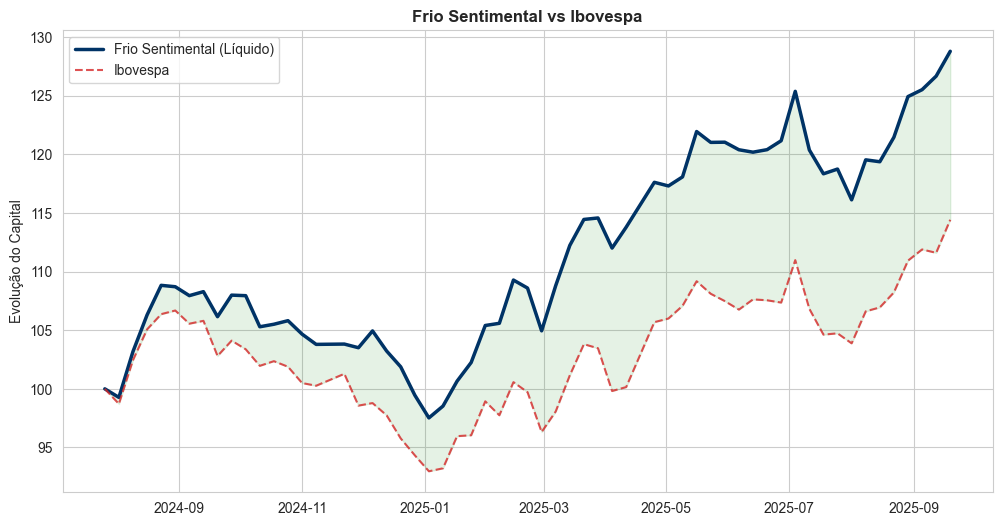

In [11]:
sns.set_style("whitegrid")

print("--- Relatório de Performance ---")

if 'dfBacktest' not in locals() or dfBacktest.empty:
    raise ValueError

retornosPort = dfBacktest['Valor'].pct_change().fillna(0)
retornosIbov = dfBacktest['RetornoIbov'].diff().fillna(0)

def calcularMetricas(rPort, rBench):
    # Retorno Total
    retTotal = (1 + rPort).prod() - 1
    
    # Risco (Anualizado)
    vol = rPort.std() * np.sqrt(52)
    
    # Downside Risk (Sortino)
    neg_rets = rPort[rPort < 0]
    downsideRisk = neg_rets.std() * np.sqrt(52) if len(neg_rets) > 0 else 0.01
    
    # Drawdown
    cumRet = (1 + rPort).cumprod()
    peak = cumRet.cummax()
    drawdown = (cumRet - peak) / peak
    maxDD = drawdown.min()
    
    # Índices
    rfSemanal = (1 + 0.10)**(1/52) - 1 
    excessRet = rPort - rfSemanal
    
    std_port = rPort.std()
    sharpe = (excessRet.mean() / std_port * np.sqrt(52)) if std_port > 0 else 0
    sortino = (excessRet.mean() / downsideRisk * np.sqrt(52)) if downsideRisk > 0 else 0
    
    # Beta e Alpha
    try:
        covMat = np.cov(rPort, rBench)
        beta = covMat[0,1] / covMat[1,1]
        # Alpha de Jensen Anualizado
        alpha = (rPort.mean() - (rfSemanal + beta * (rBench.mean() - rfSemanal))) * 52
    except:
        beta = 0.0
        alpha = 0.0
    
    win_rate = len(rPort[rPort > 0]) / len(rPort) if len(rPort) > 0 else 0

    return {
        'Retorno Total': retTotal,
        'Volatilidade': vol,
        'Sharpe': sharpe,
        'Sortino': sortino,
        'Max Drawdown': maxDD,
        'Beta': beta,
        'Alpha': alpha,
        'Win Rate': win_rate
    }

metrics = calcularMetricas(retornosPort, retornosIbov)

print("\n" + "="*45)
print(f"MÉTRICAS FINAIS -> FRIO SENTIMENTAL")
print("="*45)
print(f"Retorno Total Líquido:  {metrics['Retorno Total']:+.2%}")
print(f"Ibovespa:       {dfBacktest['RetornoIbov'].iloc[-1]:+.2%}")
print(f"Alpha:        {metrics['Alpha']:+.2%} (Anualizado)")
print("-" * 45)
print(f"Sharpe Ratio:           {metrics['Sharpe']:.2f}")
print(f"Sortino Ratio:          {metrics['Sortino']:.2f}")
print(f"Beta:                   {metrics['Beta']:.2f}")
print(f"Volatilidade (a.a.):    {metrics['Volatilidade']:.2%}")
print(f"Max Drawdown:           {metrics['Max Drawdown']:.2%}")
print(f"Win Rate Semanal:       {metrics['Win Rate']:.2%}")

if 'dfAuditoria' in locals():
    media_ativos = dfAuditoria['Qtd'].mean()
    print(f"Média Ativos/Semana:    {media_ativos:.1f}")

print("="*45)

fig, ax = plt.subplots(figsize=(12, 6))
equityCurve = (dfBacktest['Valor'] / dfBacktest['Valor'].iloc[0]) * 100
benchCurve = (1 + dfBacktest['RetornoIbov']) * 100

ax.plot(equityCurve.index, equityCurve, label='Frio Sentimental (Líquido)', color='#003366', linewidth=2.5)
ax.plot(benchCurve.index, benchCurve, label='Ibovespa', color='#d62728', linestyle='--', alpha=0.8)
ax.fill_between(equityCurve.index, equityCurve, benchCurve, where=(equityCurve >= benchCurve), interpolate=True, color='green', alpha=0.1)
ax.fill_between(equityCurve.index, equityCurve, benchCurve, where=(equityCurve < benchCurve), interpolate=True, color='red', alpha=0.1)

ax.set_title('Frio Sentimental vs Ibovespa', fontsize=12, fontweight='bold')
ax.set_ylabel('Evolução do Capital')
ax.legend(loc='upper left')
plt.show()

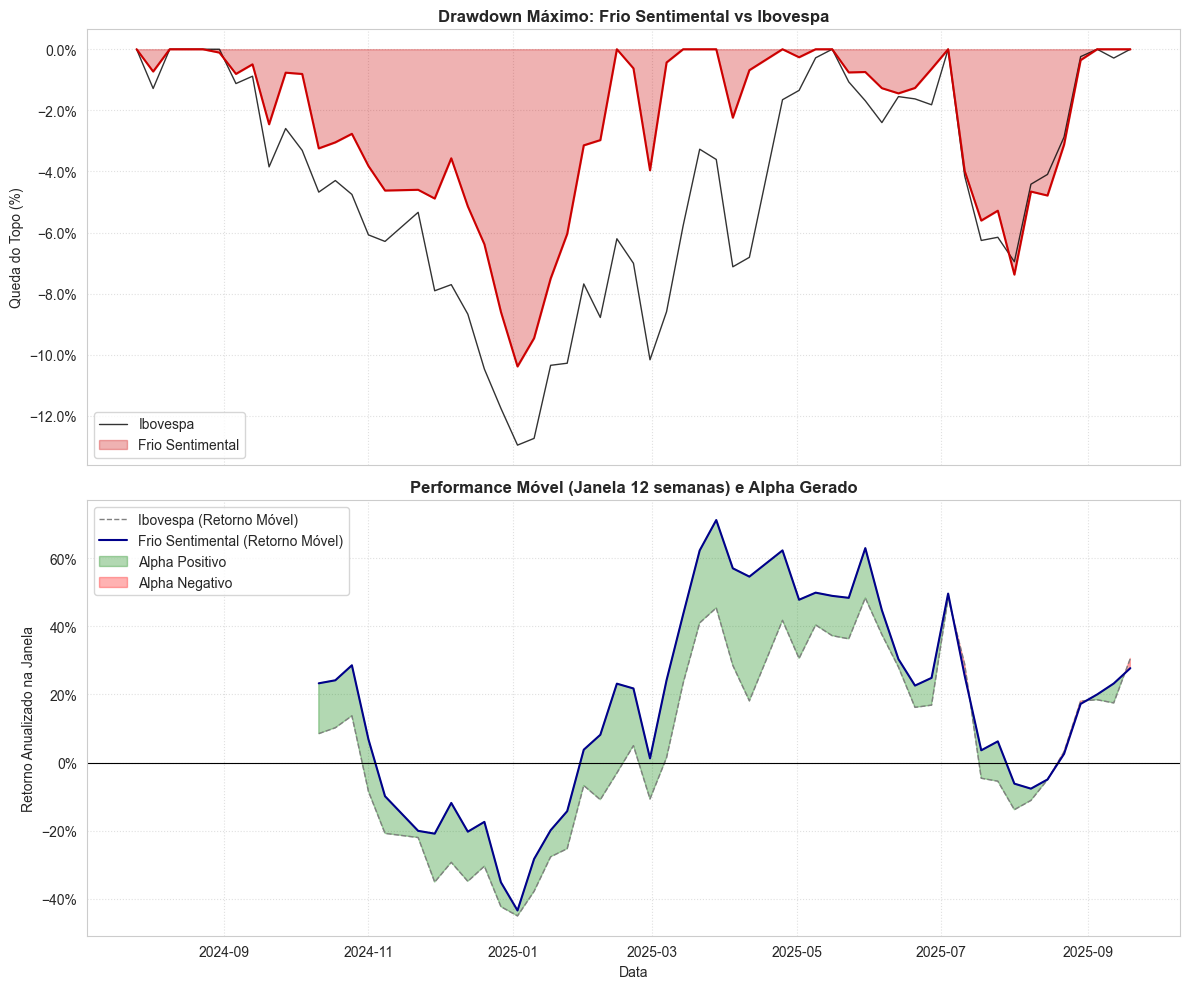

In [12]:
window = 12

# Drawdown Robô
cumRet = (1 + retornosPort).cumprod()
peak = cumRet.cummax()
drawdown = (cumRet - peak) / peak

# Drawdown Ibovespa
cumRetIbov = (1 + retornosIbov).cumprod()
peakIbov = cumRetIbov.cummax()
drawdownIbov = (cumRetIbov - peakIbov) / peakIbov

rollingRetPort = retornosPort.rolling(window).mean() * 52
rollingRetIbov = retornosIbov.rolling(window).mean() * 52

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax1.plot(drawdownIbov.index, drawdownIbov, color='black', linestyle='-', linewidth=1, label='Ibovespa', alpha=0.8)

ax1.fill_between(drawdown.index, drawdown, 0, color='#cc0000', alpha=0.3, label='Frio Sentimental')
ax1.plot(drawdown.index, drawdown, color='#cc0000', linewidth=1.5)

ax1.set_title('Drawdown Máximo: Frio Sentimental vs Ibovespa', fontweight='bold')
ax1.set_ylabel('Queda do Topo (%)')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.legend(loc='lower left')


ax2.plot(rollingRetIbov.index, rollingRetIbov, color='gray', linestyle='--', linewidth=1, label='Ibovespa (Retorno Móvel)')

ax2.plot(rollingRetPort.index, rollingRetPort, color='darkblue', linewidth=1.5, label='Frio Sentimental (Retorno Móvel)')

ax2.fill_between(rollingRetPort.index, rollingRetPort, rollingRetIbov,
                 where=(rollingRetPort >= rollingRetIbov),
                 interpolate=True, color='green', alpha=0.3, label='Alpha Positivo')

ax2.fill_between(rollingRetPort.index, rollingRetPort, rollingRetIbov,
                 where=(rollingRetPort < rollingRetIbov),
                 interpolate=True, color='red', alpha=0.3, label='Alpha Negativo')

ax2.axhline(0, color='black', linewidth=0.8) # Linha zero
ax2.set_title(f'Performance Móvel (Janela {window} semanas) e Alpha Gerado', fontweight='bold')
ax2.set_ylabel('Retorno Anualizado na Janela')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.grid(True, linestyle=':', alpha=0.6)
ax2.legend(loc='upper left')

plt.xlabel('Data')
plt.tight_layout()
plt.show()


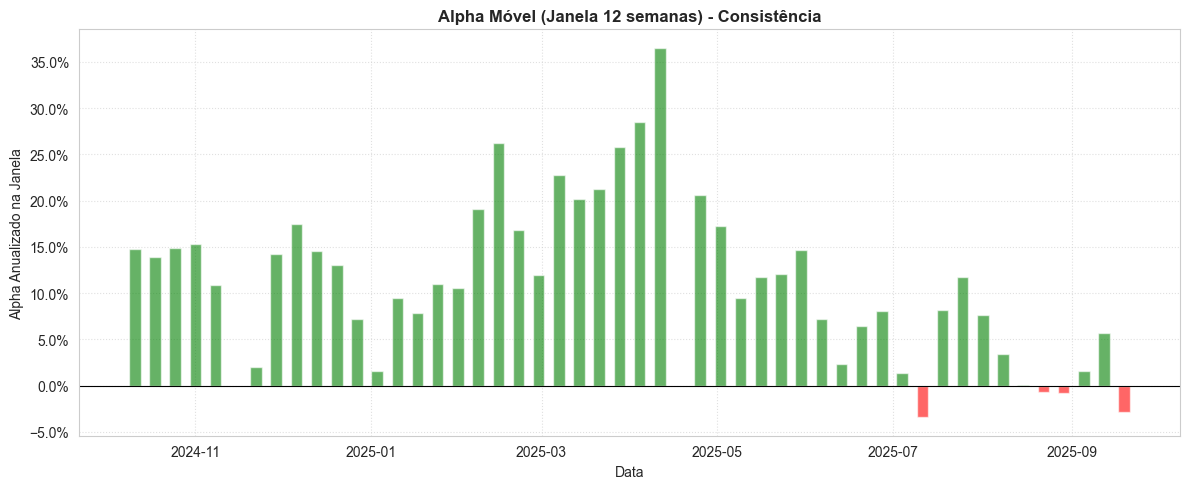

In [13]:
window = 12

rollingActiveRet = (retornosPort - retornosIbov).rolling(window).mean() * 52

fig, ax = plt.subplots(figsize=(12, 5))
colors = np.where(rollingActiveRet >= 0, 'green', 'red')

ax.bar(rollingActiveRet.index, rollingActiveRet, color=colors, alpha=0.6, width=4)

# 0
ax.axhline(0, color='black', linewidth=0.8)

ax.set_title(f'Alpha Móvel (Janela {window} semanas) - Consistência', fontweight='bold')
ax.set_ylabel('Alpha Anualizado na Janela')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(True, linestyle=':', alpha=0.6)

plt.xlabel('Data')
plt.tight_layout()
plt.show()

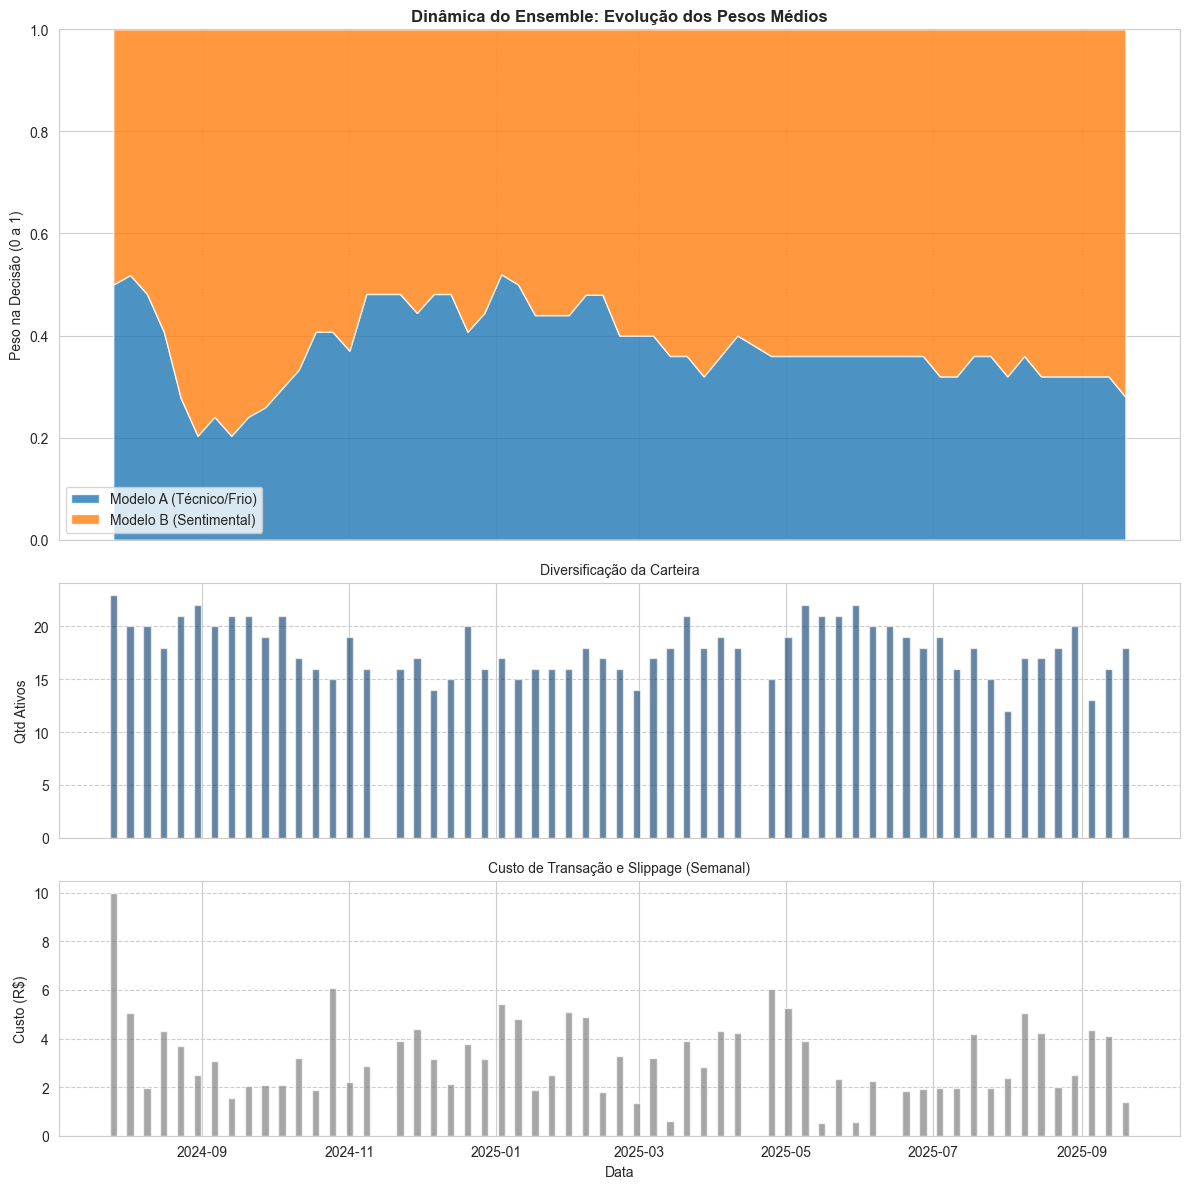

Custo Total Operacional: R$ 186.00
Peso Médio Modelo A:     0.38
Peso Médio Modelo B:     0.62


In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True, gridspec_kw={'height_ratios': [2, 1, 1]})

# Pesos dos modelos
ax1.stackplot(dfAuditoria.index, 
              dfAuditoria['PesoMedioA'], 
              dfAuditoria['PesoMedioB'], 
              labels=['Modelo A (Técnico/Frio)', 'Modelo B (Sentimental)'],
              colors=['#1f77b4', '#ff7f0e'], alpha=0.8)
ax1.set_title('Dinâmica do Ensemble: Evolução dos Pesos Médios', fontweight='bold')
ax1.set_ylabel('Peso na Decisão (0 a 1)')
ax1.set_ylim(0, 1.0)
ax1.legend(loc='lower left')
ax1.grid(True, axis='x', linestyle=':')

# Diversificação
ax2.bar(dfAuditoria.index, dfAuditoria['Qtd'], color='#003366', alpha=0.6, width=3)
ax2.set_ylabel('Qtd Ativos')
ax2.set_title('Diversificação da Carteira', fontsize=10)
ax2.grid(True, axis='y', linestyle='--')

# Custos Operacionais
ax3.bar(dfAuditoria.index, dfAuditoria['Custo'], color='gray', alpha=0.7, width=3, label='Custo Semanal (R$)')
ax3.set_ylabel('Custo (R$)')
ax3.set_title('Custo de Transação e Slippage (Semanal)', fontsize=10)
ax3.grid(True, axis='y', linestyle='--')

plt.xlabel('Data')
plt.tight_layout()
plt.show()

# Resumo Final de Auditoria
print(f"Custo Total Operacional: R$ {dfAuditoria['Custo'].sum():.2f}")
print(f"Peso Médio Modelo A:     {dfAuditoria['PesoMedioA'].mean():.2f}")
print(f"Peso Médio Modelo B:     {dfAuditoria['PesoMedioB'].mean():.2f}")

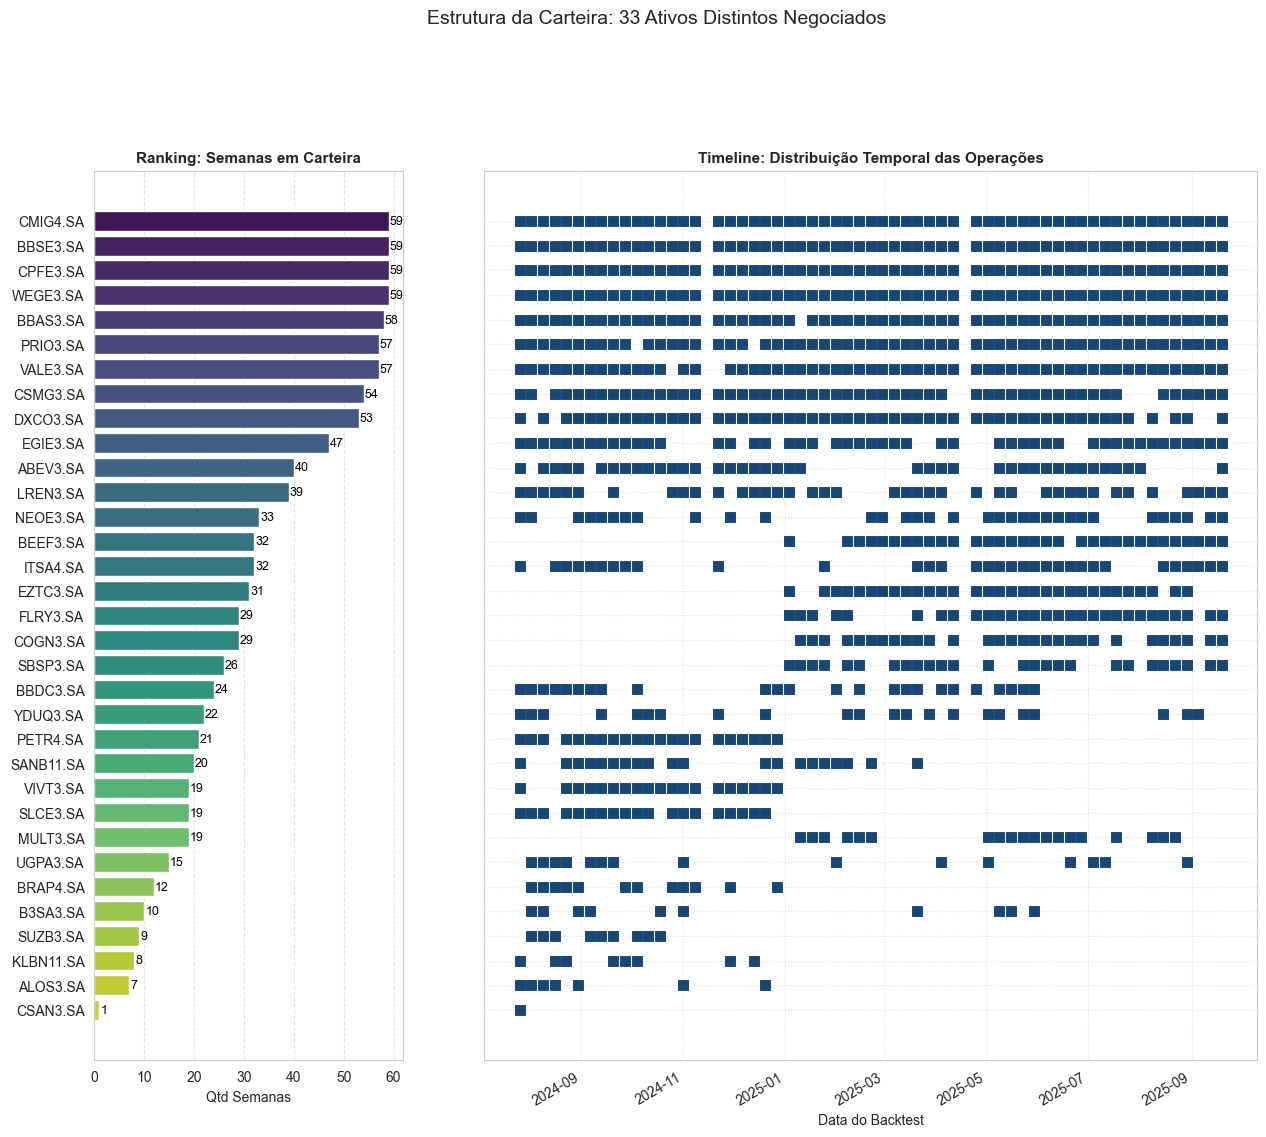


>>> Tabela de Distribuição (Top 10):
ATIVO        | SEMANAS  | PRESENÇA %
-----------------------------------
CMIG4.SA     | 59       | 100.0%
BBSE3.SA     | 59       | 100.0%
CPFE3.SA     | 59       | 100.0%
WEGE3.SA     | 59       | 100.0%
BBAS3.SA     | 58       | 98.3%
PRIO3.SA     | 57       | 96.6%
VALE3.SA     | 57       | 96.6%
CSMG3.SA     | 54       | 91.5%
DXCO3.SA     | 53       | 89.8%
EGIE3.SA     | 47       | 79.7%


In [18]:
dfExp = dfAuditoria.explode('Ativos').reset_index()
dfExp = dfExp.dropna(subset=['Ativos'])

rankAtivos = dfExp['Ativos'].value_counts()

ordem_ativos = rankAtivos.index.tolist()

dfExp['Ativos'] = pd.Categorical(dfExp['Ativos'], categories=ordem_ativos, ordered=True)

Altura = max(6, len(rankAtivos) * 0.35)

fig = plt.figure(figsize=(15, Altura))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 2.5], wspace=0.15)

ax1 = fig.add_subplot(gs[0])

sns.barplot(x=rankAtivos.values, y=rankAtivos.index, ax=ax1, 
            palette="viridis", hue=rankAtivos.index, legend=False,
            order=ordem_ativos) 

ax1.set_title("Ranking: Semanas em Carteira", fontweight='bold', fontsize=11)
ax1.set_xlabel("Qtd Semanas")
ax1.set_ylabel("")
ax1.grid(axis='x', linestyle='--', alpha=0.5)

for i, v in enumerate(rankAtivos.values):
    ax1.text(v + 0.2, i, str(v), color='black', va='center', fontsize=9)

ax2 = fig.add_subplot(gs[1], sharey=ax1)
m
sns.scatterplot(data=dfExp, x='Data', y='Ativos', ax=ax2,
                s=60, marker='s', color='#003366', edgecolor=None, alpha=0.9)

ax2.set_title("Timeline: Distribuição Temporal das Operações", fontweight='bold', fontsize=11)
ax2.set_xlabel("Data do Backtest")
ax2.set_ylabel("")
ax2.tick_params(axis='y', left=False, labelleft=False) 
ax2.grid(True, linestyle=':', alpha=0.6)

plt.setp(ax2.get_xticklabels(), rotation=30, ha="right")

plt.suptitle(f"Estrutura da Carteira: {len(rankAtivos)} Ativos Distintos Negociados", 
             fontsize=14, y=1.02)

plt.show()
print("\n>>> Tabela de Distribuição (Top 10):")
total_semanas = len(dfAuditoria)
print(f"{'ATIVO':<12} | {'SEMANAS':<8} | {'PRESENÇA %':<10}")
print("-" * 35)
for ativo, qtd in rankAtivos.head(10).items():
    pct = (qtd / total_semanas) * 100
    print(f"{ativo:<12} | {qtd:<8} | {pct:.1f}%")

C:\Users\alexi\AppData\Local\Temp\ipykernel_11784\1528450429.py:79: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ibov = yf.download('^BVSP', start=startBuffer, end=endBuffer, progress=False)['Close']



 PERFORMANCE MODELO A
Retorno Total Líquido:  +21.05%
Ibovespa:       +14.41%
Alpha:        +5.54% (Anualizado)
---------------------------------------------
Sharpe Ratio:           0.58
Sortino Ratio:          0.15
Beta:                   0.89
Volatilidade (a.a.):    14.47%
Max Drawdown:           -10.75%
Win Rate Semanal:       49.15%
Média Ativos/Semana:    13.0 papéis


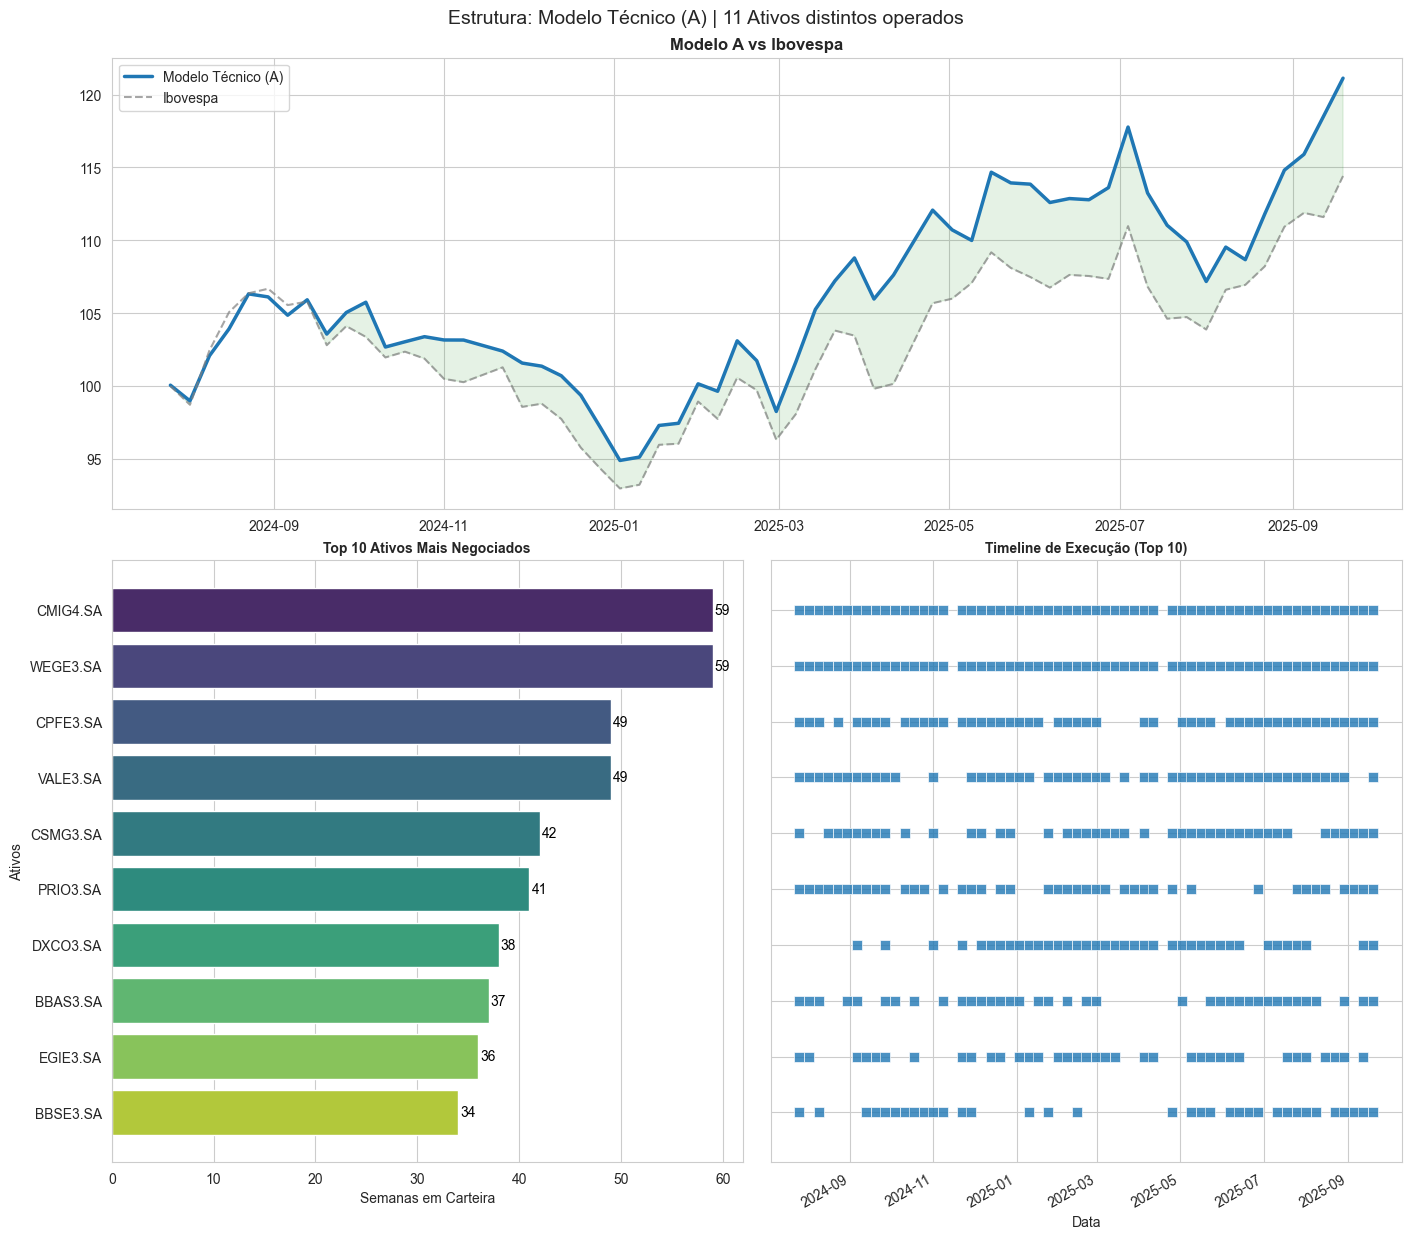

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [14, 12]

# Parâmetros básicos

carteiraInicial = 10000.00
caixaAtual = carteiraInicial
custoTransacao = 0.001 
historicoA = []
logAuditoriaA = []
carteiraAnterior = set()
periodoBacktest = pd.to_datetime(periodoBacktest).normalize().tz_localize(None)

for dataAtual in periodoBacktest:
    
    # Filtro
    try: tickersFund = selecionar_top_fundamental(dataAtual.year - 1)
    except: tickersFund = ativos
    
    if not tickersFund:
        historicoA.append({'Data': dataAtual, 'Valor': caixaAtual})
        logAuditoriaA.append({'Data': dataAtual, 'Qtd': 0, 'Ativos': []})
        continue

    ativosCompra = []
    
    for t in tickersFund:
        ticker = t if t.endswith('.SA') else f"{t}.SA"
        if ticker not in Liquidez: continue
        
        try:
            if Liquidez[ticker].asof(dataAtual) < 500000: continue
        except: continue

        try:
            sigA = sinaisA.loc[dataAtual, ticker] if (dataAtual in sinaisA.index) else 0
            if sigA >= 0.5:
                ativosCompra.append(ticker)
        except: continue

    setAtual = set(ativosCompra)
    
    if len(setAtual) > 0:
        turnover = (len(setAtual - carteiraAnterior) + len(carteiraAnterior - setAtual)) / len(setAtual)
    else:
        turnover = 0.0
        
    custo = (caixaAtual * turnover) * custoTransacao 
    carteiraAnterior = setAtual

    # Rentabilidade
    rentabilidade = 0.0
    if ativosCompra:
        rets = []
        for ticker in ativosCompra:
            if ticker in retornos:
                dfR = retornos[ticker]
                mask = dfR['Data'] == dataAtual
                if mask.any():
                    rets.append(dfR.loc[mask, 'Retorno Semanal'].values[0])
        if rets: rentabilidade = np.mean(rets)
    
    # Atualização
    caixaAtual = caixaAtual * (1 + rentabilidade) - custo
    historicoA.append({'Data': dataAtual, 'Valor': caixaAtual})
    
    logAuditoriaA.append({
        'Data': dataAtual,
        'Qtd': len(ativosCompra),
        'Ativos': ativosCompra
    })

dfA = pd.DataFrame(historicoA).set_index('Data')
dfAuditoriaA = pd.DataFrame(logAuditoriaA).set_index('Data')

startBuffer = (dfA.index[0] - pd.Timedelta(days=45)).strftime('%Y-%m-%d')
endBuffer = (dfA.index[-1] + pd.Timedelta(days=10)).strftime('%Y-%m-%d')
try:
    ibov = yf.download('^BVSP', start=startBuffer, end=endBuffer, progress=False)['Close']
    if isinstance(ibov, pd.DataFrame): ibov = ibov.squeeze()
    ibov = ibov.dropna().tz_localize(None).reindex(dfA.index, method='ffill').bfill()
    ibovRet = (ibov / ibov.iloc[0]) - 1
except:
    ibovRet = pd.Series(0, index=dfA.index)

retornosPort = dfA['Valor'].pct_change().fillna(0)
retornosIbov = ibovRet.diff().fillna(0)

# Métricas
def calcularMetricas(rPort, rBench):
    retTotal = (1 + rPort).prod() - 1
    vol = rPort.std() * np.sqrt(52)
    
    neg_rets = rPort[rPort < 0]
    downsideRisk = neg_rets.std() * np.sqrt(52) if len(neg_rets) > 0 else 0.01
    
    cumRet = (1 + rPort).cumprod()
    maxDD = ((cumRet - cumRet.cummax()) / cumRet.cummax()).min()
    
    rfSemanal = (1 + 0.10)**(1/52) - 1
    excessRet = rPort - rfSemanal
    sharpe = (excessRet.mean() / rPort.std() * np.sqrt(52)) if rPort.std() > 0 else 0
    sortino = (excessRet.mean() / downsideRisk * np.sqrt(52))
    
    try:
        cov = np.cov(rPort, rBench)
        beta = cov[0,1]/cov[1,1]
        alpha = (rPort.mean() - (rfSemanal + beta*(rBench.mean()-rfSemanal)))*52
    except: beta, alpha = 0, 0
    
    win_rate = len(rPort[rPort > 0]) / len(rPort) if len(rPort) > 0 else 0
    
    return {'Retorno Total': retTotal, 'Volatilidade': vol, 'Sharpe': sharpe, 
            'Sortino': sortino, 'Max Drawdown': maxDD, 'Beta': beta, 
            'Alpha': alpha, 'Win Rate': win_rate}

m = calcularMetricas(retornosPort, retornosIbov)
media_ativos = dfAuditoriaA['Qtd'].mean()

print("\n" + "="*45)
print(f" PERFORMANCE MODELO A")
print("="*45)
print(f"Retorno Total Líquido:  {m['Retorno Total']:+.2%}")
print(f"Ibovespa:       {ibovRet.iloc[-1]:+.2%}")
print(f"Alpha:        {m['Alpha']:+.2%} (Anualizado)")
print("-" * 45)
print(f"Sharpe Ratio:           {m['Sharpe']:.2f}")
print(f"Sortino Ratio:          {m['Sortino']:.2f}")
print(f"Beta:                   {m['Beta']:.2f}")
print(f"Volatilidade (a.a.):    {m['Volatilidade']:.2%}")
print(f"Max Drawdown:           {m['Max Drawdown']:.2%}")
print(f"Win Rate Semanal:       {m['Win Rate']:.2%}")
print(f"Média Ativos/Semana:    {media_ativos:.1f} papéis")
print("="*45)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(3, 2, height_ratios=[1.5, 1, 1])

ax1 = fig.add_subplot(gs[0, :])
equity = (dfA['Valor'] / carteiraInicial) * 100
bench = (1 + ibovRet) * 100
ax1.plot(equity.index, equity, label='Modelo Técnico (A)', color='#1f77b4', linewidth=2.5)
ax1.plot(bench.index, bench, label='Ibovespa', color='gray', linestyle='--', alpha=0.7)
ax1.fill_between(equity.index, equity, bench, where=(equity>=bench), color='green', alpha=0.1)
ax1.set_title('Modelo A vs Ibovespa', fontweight='bold')
ax1.legend(loc='upper left')

dfExp = dfAuditoriaA.explode('Ativos').reset_index().dropna(subset=['Ativos'])
ranking = dfExp['Ativos'].value_counts().head(10)

ordem_ativos = ranking.index.tolist()
dfExp['Ativos'] = pd.Categorical(dfExp['Ativos'], categories=ordem_ativos, ordered=True)

ax2 = fig.add_subplot(gs[1:, 0])
sns.barplot(x=ranking.values, y=ranking.index, ax=ax2, palette="viridis", hue=ranking.index, legend=False, order=ordem_ativos)
ax2.set_title(f'Top 10 Ativos Mais Negociados', fontweight='bold', fontsize=10)
ax2.set_xlabel('Semanas em Carteira')
for i, v in enumerate(ranking.values):
    ax2.text(v + 0.2, i, str(v), color='black', va='center')

ax3 = fig.add_subplot(gs[1:, 1], sharey=ax2)

df_timeline = dfExp[dfExp['Ativos'].isin(ordem_ativos)]

sns.scatterplot(data=df_timeline, x='Data', y='Ativos', ax=ax3, s=50, marker='s', color='#1f77b4', alpha=0.8)
ax3.set_title('Timeline de Execução (Top 10)', fontweight='bold', fontsize=10)
ax3.set_ylabel("")
ax3.tick_params(left=False, labelleft=False)
plt.setp(ax3.get_xticklabels(), rotation=30, ha='right')

plt.suptitle(f"Estrutura: Modelo Técnico (A) | {len(dfExp['Ativos'].unique())} Ativos distintos operados", fontsize=14, y=1.02)
plt.show()

C:\Users\alexi\AppData\Local\Temp\ipykernel_11784\179961503.py:80: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ibov = yf.download('^BVSP', start=startBuffer, end=endBuffer, progress=False)['Close']



 PERFORMANCE MODELO B
Retorno Total Líquido:  +25.12%
Ibovespa:       +14.41%
Alpha:        +8.35% (Anualizado)
---------------------------------------------
Sharpe Ratio:           0.82
Sortino Ratio:          0.22
Beta:                   0.89
Volatilidade (a.a.):    13.59%
Max Drawdown:           -12.87%
Win Rate Semanal:       55.93%
Média Ativos/Semana:    20.5 papéis


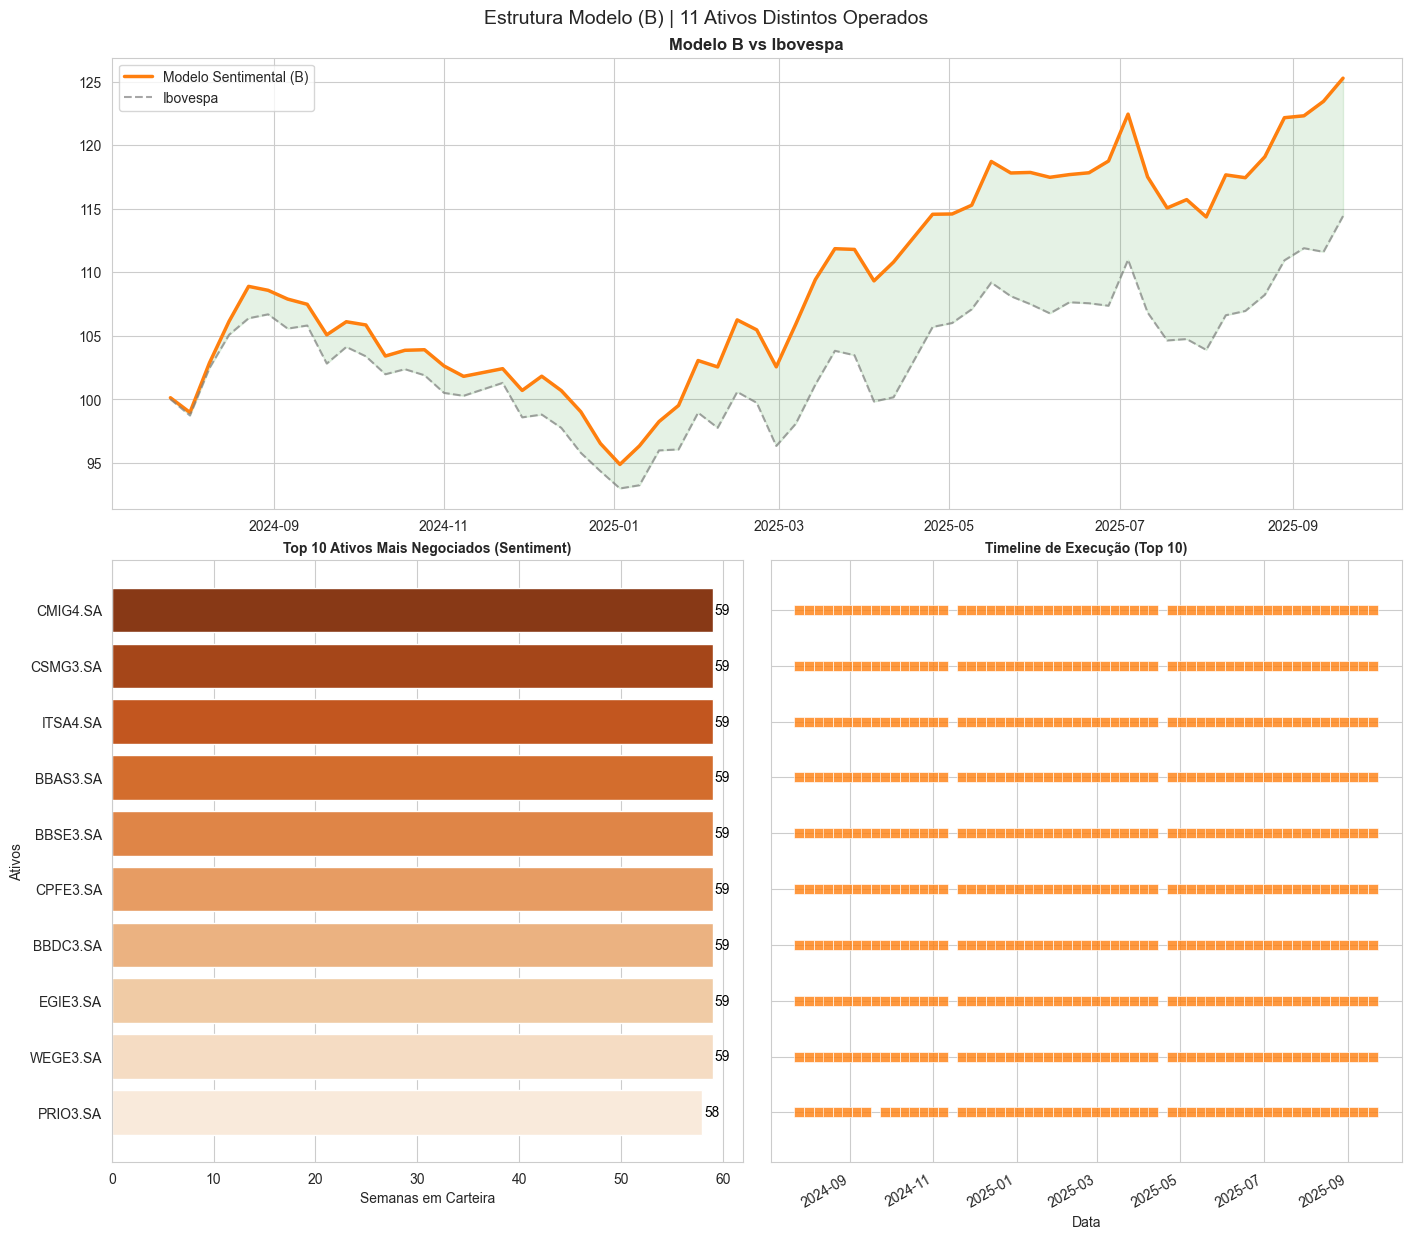

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [14, 12]

# Parâmetros básicos
carteiraInicial = 10000.00
caixaAtual = carteiraInicial
custoTransacao = 0.001 
historicoB = []
logAuditoriaB = []
carteiraAnterior = set()

periodoBacktest = pd.to_datetime(periodoBacktest).normalize().tz_localize(None)

for dataAtual in periodoBacktest:
    
    # Filtro 
    try: tickersFund = selecionar_top_fundamental(dataAtual.year - 1)
    except: tickersFund = ativos
    
    if not tickersFund:
        historicoB.append({'Data': dataAtual, 'Valor': caixaAtual})
        logAuditoriaB.append({'Data': dataAtual, 'Qtd': 0, 'Ativos': []})
        continue

    ativosCompra = []
    
    for t in tickersFund:
        ticker = t if t.endswith('.SA') else f"{t}.SA"
        if ticker not in Liquidez: continue
        
        try:
            if Liquidez[ticker].asof(dataAtual) < 500000: continue
        except: continue

        try:
            sigB = sinaisB.loc[dataAtual, ticker] if (dataAtual in sinaisB.index) else 0
            if sigB >= 0.5:
                ativosCompra.append(ticker)
        except: continue

    setAtual = set(ativosCompra)
    
    if len(setAtual) > 0:
        turnover = (len(setAtual - carteiraAnterior) + len(carteiraAnterior - setAtual)) / len(setAtual)
    else:
        turnover = 0.0
        
    custo = (caixaAtual * turnover) * custoTransacao 
    carteiraAnterior = setAtual

    # Rentabilidade
    rentabilidade = 0.0
    if ativosCompra:
        rets = []
        for ticker in ativosCompra:
            if ticker in retornos:
                dfR = retornos[ticker]
                mask = dfR['Data'] == dataAtual
                if mask.any():
                    rets.append(dfR.loc[mask, 'Retorno Semanal'].values[0])
        if rets: rentabilidade = np.mean(rets)
    
    # Atualização
    caixaAtual = caixaAtual * (1 + rentabilidade) - custo
    historicoB.append({'Data': dataAtual, 'Valor': caixaAtual})
    
    # Log 
    logAuditoriaB.append({
        'Data': dataAtual,
        'Qtd': len(ativosCompra),
        'Ativos': ativosCompra
    })

dfB = pd.DataFrame(historicoB).set_index('Data')
dfAuditoriaB = pd.DataFrame(logAuditoriaB).set_index('Data')

startBuffer = (dfB.index[0] - pd.Timedelta(days=45)).strftime('%Y-%m-%d')
endBuffer = (dfB.index[-1] + pd.Timedelta(days=10)).strftime('%Y-%m-%d')
try:
    ibov = yf.download('^BVSP', start=startBuffer, end=endBuffer, progress=False)['Close']
    if isinstance(ibov, pd.DataFrame): ibov = ibov.squeeze()
    ibov = ibov.dropna().tz_localize(None).reindex(dfB.index, method='ffill').bfill()
    ibovRet = (ibov / ibov.iloc[0]) - 1
except:
    ibovRet = pd.Series(0, index=dfB.index)

retornosPort = dfB['Valor'].pct_change().fillna(0)
retornosIbov = ibovRet.diff().fillna(0)

# Métricas
def calcularMetricas(rPort, rBench):
    retTotal = (1 + rPort).prod() - 1
    vol = rPort.std() * np.sqrt(52)
    
    neg_rets = rPort[rPort < 0]
    downsideRisk = neg_rets.std() * np.sqrt(52) if len(neg_rets) > 0 else 0.01
    
    cumRet = (1 + rPort).cumprod()
    maxDD = ((cumRet - cumRet.cummax()) / cumRet.cummax()).min()
    
    rfSemanal = (1 + 0.10)**(1/52) - 1
    excessRet = rPort - rfSemanal
    sharpe = (excessRet.mean() / rPort.std() * np.sqrt(52)) if rPort.std() > 0 else 0
    sortino = (excessRet.mean() / downsideRisk * np.sqrt(52))
    
    try:
        cov = np.cov(rPort, rBench)
        beta = cov[0,1]/cov[1,1]
        alpha = (rPort.mean() - (rfSemanal + beta*(rBench.mean()-rfSemanal)))*52
    except: beta, alpha = 0, 0
    
    win_rate = len(rPort[rPort > 0]) / len(rPort) if len(rPort) > 0 else 0
    
    return {'Retorno Total': retTotal, 'Volatilidade': vol, 'Sharpe': sharpe, 
            'Sortino': sortino, 'Max Drawdown': maxDD, 'Beta': beta, 
            'Alpha': alpha, 'Win Rate': win_rate}

m = calcularMetricas(retornosPort, retornosIbov)
media_ativos = dfAuditoriaB['Qtd'].mean()

print("\n" + "="*45)
print(f" PERFORMANCE MODELO B")
print("="*45)
print(f"Retorno Total Líquido:  {m['Retorno Total']:+.2%}")
print(f"Ibovespa:       {ibovRet.iloc[-1]:+.2%}")
print(f"Alpha:        {m['Alpha']:+.2%} (Anualizado)")
print("-" * 45)
print(f"Sharpe Ratio:           {m['Sharpe']:.2f}")
print(f"Sortino Ratio:          {m['Sortino']:.2f}")
print(f"Beta:                   {m['Beta']:.2f}")
print(f"Volatilidade (a.a.):    {m['Volatilidade']:.2%}")
print(f"Max Drawdown:           {m['Max Drawdown']:.2%}")
print(f"Win Rate Semanal:       {m['Win Rate']:.2%}")
print(f"Média Ativos/Semana:    {media_ativos:.1f} papéis")
print("="*45)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(3, 2, height_ratios=[1.5, 1, 1])

ax1 = fig.add_subplot(gs[0, :])
equity = (dfB['Valor'] / carteiraInicial) * 100
bench = (1 + ibovRet) * 100

ax1.plot(equity.index, equity, label='Modelo Sentimental (B)', color='#ff7f0e', linewidth=2.5) 
ax1.plot(bench.index, bench, label='Ibovespa', color='gray', linestyle='--', alpha=0.7)
ax1.fill_between(equity.index, equity, bench, where=(equity>=bench), color='green', alpha=0.1)
ax1.set_title('Modelo B vs Ibovespa', fontweight='bold')
ax1.legend(loc='upper left')

dfExp = dfAuditoriaB.explode('Ativos').reset_index().dropna(subset=['Ativos'])
ranking = dfExp['Ativos'].value_counts().head(10) # Top 10

ordem_ativos = ranking.index.tolist()
dfExp['Ativos'] = pd.Categorical(dfExp['Ativos'], categories=ordem_ativos, ordered=True)

ax2 = fig.add_subplot(gs[1:, 0])

sns.barplot(x=ranking.values, y=ranking.index, ax=ax2, palette="Oranges_r", hue=ranking.index, legend=False, order=ordem_ativos)
ax2.set_title(f'Top 10 Ativos Mais Negociados (Sentiment)', fontweight='bold', fontsize=10)
ax2.set_xlabel('Semanas em Carteira')
for i, v in enumerate(ranking.values):
    ax2.text(v + 0.2, i, str(v), color='black', va='center')

ax3 = fig.add_subplot(gs[1:, 1], sharey=ax2)

df_timeline = dfExp[dfExp['Ativos'].isin(ordem_ativos)]

sns.scatterplot(data=df_timeline, x='Data', y='Ativos', ax=ax3, s=50, marker='s', color='#ff7f0e', alpha=0.8)
ax3.set_title('Timeline de Execução (Top 10)', fontweight='bold', fontsize=10)
ax3.set_ylabel("")
ax3.tick_params(left=False, labelleft=False)
plt.setp(ax3.get_xticklabels(), rotation=30, ha='right')

plt.suptitle(f"Estrutura Modelo (B) | {len(dfExp['Ativos'].unique())} Ativos Distintos Operados", fontsize=14, y=1.02)
plt.show()